In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [8]:
# Preproccessing Energy Consumption Data
# Load the dataset
energy_data = pd.read_csv('../dataset/filtered_energy_data (Indonesia).csv')

# Clean column names
energy_data.columns = energy_data.columns.str.strip().str.replace('\n', ' ')

# Remove commas from numeric columns and convert them to float
numeric_cols_with_commas = energy_data.select_dtypes(include=['object']).columns
for col in numeric_cols_with_commas:
    try:
        energy_data[col] = energy_data[col].str.replace(',', '').astype(float)
    except ValueError:
        continue  # Skip columns that cannot be converted

# Handle missing values
# Fill numeric columns with the mean
numeric_cols = energy_data.select_dtypes(include=['number']).columns
energy_data[numeric_cols] = energy_data[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Fill non-numeric columns with the mode (most frequent value)
non_numeric_cols = energy_data.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    mode_value = energy_data[col].mode()[0]
    energy_data[col] = energy_data[col].fillna(mode_value)

# Adjusted feature list based on actual column names
features = ['Access to electricity (% of population)', 'Access to clean fuels for cooking',
            'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)',
            'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)',
            'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
            'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country',
            'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita',
            r'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']

# Assuming 'Primary energy consumption per capita (kWh/person)' as the target variable
target = 'Primary energy consumption per capita (kWh/person)'

# Select relevant columns
X = energy_data[features]
y = energy_data[target]

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape data for RNN input (samples, timesteps, features)
timesteps = 1  # number of time steps (or sequence length)
X_train_rnn = X_train.reshape((X_train.shape[0], timesteps, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], timesteps, X_test.shape[1]))

energy_data.head(21)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Indonesia,2000,86.30000,6.10,25.89,2.320000e+06,45.6200,78.43,NaN,19.60,...,5435.4355,5.4200,280650.000000,3.733640,4.920068,780.190205,151,1904569.0,-0.789275,113.921327
1,Indonesia,2001,86.26000,6.90,21.71,5.090000e+06,44.3300,83.96,NaN,22.19,...,5740.4346,5.3400,302060.000000,4.112387,3.643466,748.257609,151,1904569.0,-0.789275,113.921327
2,Indonesia,2002,87.60000,8.00,21.61,1.200000e+05,44.6600,92.03,NaN,21.00,...,5815.3860,5.3000,305640.014600,3.683814,4.499475,900.177588,151,1904569.0,-0.789275,113.921327
3,Indonesia,2003,87.94000,9.30,21.48,2.013100e+08,43.0000,97.57,NaN,19.82,...,6224.9414,5.0700,333890.014600,3.221095,4.780369,1065.648520,151,1904569.0,-0.789275,113.921327
4,Indonesia,2004,89.01000,11.30,21.40,5.167000e+07,41.4600,103.80,NaN,20.97,...,6087.6787,5.1400,341239.990200,3.425964,5.030874,1150.261367,151,1904569.0,-0.789275,113.921327
5,Indonesia,2005,85.03832,14.10,23.61,1.883500e+08,41.5700,110.22,NaN,22.66,...,6186.4365,4.9400,342149.993900,3.527426,5.692571,1263.287332,151,1904569.0,-0.789275,113.921327
6,Indonesia,2006,90.62000,17.90,24.78,2.558400e+08,40.0700,116.80,NaN,21.18,...,6211.2920,4.7900,364470.001200,3.220308,5.500952,1589.801489,151,1904569.0,-0.789275,113.921327
7,Indonesia,2007,91.10000,22.50,24.93,6.021000e+08,40.0100,124.10,NaN,24.29,...,6579.2300,4.4800,379959.991500,3.370551,6.345022,1860.002811,151,1904569.0,-0.789275,113.921327
8,Indonesia,2008,92.73000,28.50,24.94,1.944000e+07,41.1200,129.55,NaN,26.34,...,6569.1010,4.3000,376140.014600,3.586532,6.013704,2166.854231,151,1904569.0,-0.789275,113.921327
9,Indonesia,2009,93.55000,34.70,28.08,2.922000e+07,38.1800,136.05,NaN,26.79,...,6662.8240,4.3400,391079.986600,3.655174,4.628871,2261.247309,151,1904569.0,-0.789275,113.921327


In [5]:
# Preproccessing Weather data

# Load your preprocessed dataset
weather_data = pd.read_csv('dataset/filtered_climate_data.csv')

# Fill NaN values with the mean of each column
weather_data.fillna(weather_data.select_dtypes(include=np.number).mean(), inplace=True)

# Select relevant features
features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']
selected_data = weather_data[features]

# Handle non-numeric columns (if any other non-numeric columns exist)
selected_data = selected_data.select_dtypes(include=['number'])

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)
scaled_df = pd.DataFrame(scaled_data, columns=selected_data.columns)

# Define features and target variable
X = scaled_df.drop(columns=['Tavg'])  # Features
y = scaled_df['Tavg']  # Target variable

# Split the data (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data to 3D for RNN: (samples, timesteps, features)
# Here, timesteps = 1 for simplicity
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Print the first few rows of your preprocessed dataset
weather_data.head(600000)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,2018-01-01,23.0,29.4,26.6,87.0,49.500000,0.0,8.0,120.0,4.0,SE,96001
1,2018-01-02,22.6,28.8,25.9,90.0,70.500000,5.5,6.0,120.0,3.0,E,96001
2,2018-01-03,22.8,28.2,24.8,93.0,28.300000,2.0,8.0,130.0,5.0,SE,96001
3,2018-01-04,23.6,30.2,25.8,90.0,28.800000,0.0,6.0,130.0,3.0,SE,96001
4,2018-01-05,23.2,29.2,26.0,88.0,8.648519,4.0,4.0,160.0,0.0,N,96001
...,...,...,...,...,...,...,...,...,...,...,...,...
172697,2020-12-27,25.2,31.2,29.2,74.0,0.000000,1.4,4.0,280.0,2.0,C,97980
172698,2020-12-28,25.3,31.6,28.1,78.0,8.648519,3.0,12.0,260.0,2.0,C,97980
172699,2020-12-29,24.6,32.3,28.4,81.0,8.648519,6.5,5.0,260.0,2.0,SW,97980
172700,2020-12-30,25.2,32.6,28.4,80.0,0.000000,2.4,7.0,260.0,2.0,C,97980


c:\Users\Raffi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,001 (11.72 KB)

 Trainable params: 3,001 (11.72 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1.6368e-04 - val_loss: 8.1018e-05
Epoch 2/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 8.4768e-05 - val_loss: 5.9328e-05
Epoch 3/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 7.7117e-05 - val_loss: 6.9175e-05
Epoch 4/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 7.7794e-05 - val_loss: 5.7644e-05
Epoch 5/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 7.9979e-05 - val_loss: 5.4906e-05
Epoch 6/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 8.5410e-05 - val_loss: 6.3902e-05
Epoch 7/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 8.0849e-05 - val_loss: 6.7617e-05
Epoch 8/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 9.0567e-05 - val_loss: 5.7473e-05
Epoch 9/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 7.4159e-05 - val_loss: 6.5133e-05
Epoch 10/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 8.8288e-05 - val_loss: 5.9453e-05
Epoch 11/50
4318/4318 ━━━━━━━━━━━━━━━━━

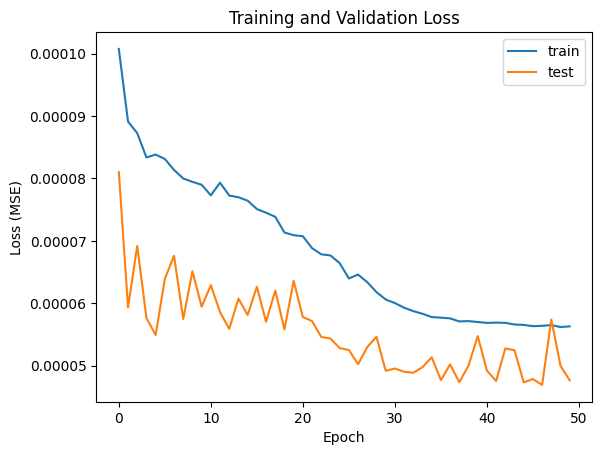

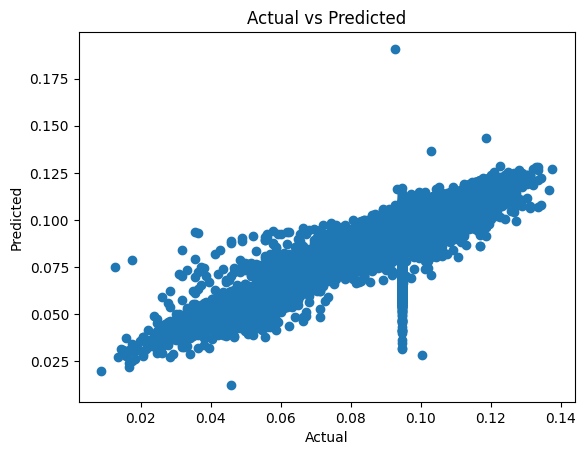

In [6]:
# RNN Model for Weather Data
model = Sequential()

# Add SimpleRNN layer
model.add(SimpleRNN(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)

# Calculate RMSE and R2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()